# Multi-focus image fusion by MFF-SSIM model

1. Import some functions

In [1]:
import torch
from MFF import MFF
from skimage.io import imread

2. Read source images

In [2]:
def to_tensor(a):
    return torch.from_numpy(a).permute(2,0,1).to(torch.float32)/255.

x1 = to_tensor(imread(r'.\test_image\coffee\image1.tif'))
x2 = to_tensor(imread(r'.\test_image\coffee\image2.tif'))
x = torch.stack((x1,x2), dim=0).cuda()

3. Create model

In [5]:
model = MFF(input = x, map_mode = 'lap')

4. Train this model

In [6]:
model.train(max_iter=300)

======================MFF-SSIM Fusion======================
*Configuration* -> [Focus map: lap], [Window Size: 25]
*Configuration* -> [Iterations: 300], [Learning Rate: 0.001]
*Configuration* -> [Deivce: cuda:0], [Dtype: torch.float32]
*Configuration* -> [#Images x Channel x Height x Width: 2 x 3 x 868 x 568]
*Fusion Starts* -> 2019-12-17 22:11:08
*Fusion   Ends* -> 2019-12-17 22:11:18
------------------------------------------------------------
(a) Elapsed time 10.391103 seconds.
(b) Initial MFF-SSIM value is 0.896753
(c) Final   MFF-SSIM value is 0.993873
Thank you for using MFF-SSIM Fusion!


5. Show some information

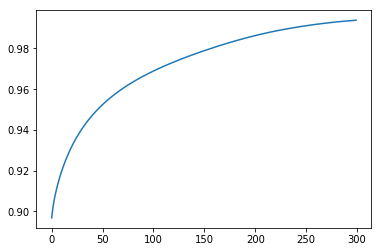

In [7]:
model.show_curve() # mff-ssim value 

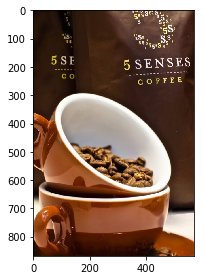

In [8]:
model.show_image() # fused image

In [9]:
model.save_image('./result/fused_image_cuda.png') # save image 

C:\Users\win10\Anaconda3\lib\site-packages\skimage\util\dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint8
  .format(dtypeobj_in, dtypeobj_out))
